                                         决策树

In [1]:
data<-read.table("标化数据.csv",header=T,sep=",")

In [2]:
data

Sample_geo_accession,Gender,Dagnoss,Grade,Age,RT,CT,PD,survival,label,codel,IDH1,dataset
GSM405200,NA,,NA,NA,NA,NA,NA,NA,,NA,NA,GSM4
GSM405201,0,OD,3,45,1,0,1,117.84,L,1,1,GSM4
GSM405202,1,OD,3,29,1,0,1,140.04,L,1,1,GSM4
GSM405203,1,OD,3,39,1,0,1,107.04,L,1,0,GSM4
GSM405204,1,OD,3,34,NA,NA,1,103.08,L,1,0,GSM4
GSM405205,1,OD,3,48,1,1,1,38.88,L,1,1,GSM4
GSM405206,1,OD,3,32,1,0,1,81.72,L,1,0,GSM4
GSM405207,0,OD,3,44,1,0,1,97.44,L,1,0,GSM4
GSM405208,1,OD,3,51,1,1,1,36.48,L,1,1,GSM4
GSM405209,NA,,NA,0,NA,NA,NA,NA,,0,NA,GSM4


In [3]:
library(rpart)
library(rpart.plot)
library(extrafont)
options(repr.plot.width=12, repr.plot.height=9)

Registering fonts with R


In [4]:
ct <- rpart.control(xval=10, minsplit=1, cp=0.1)

In [5]:
ct

$minsplit
[1] 1

$minbucket
[1] 0

$cp
[1] 0.1

$maxcompete
[1] 4

$maxsurrogate
[1] 5

$usesurrogate
[1] 2

$surrogatestyle
[1] 0

$maxdepth
[1] 30

$xval
[1] 10

In [40]:
fit <- rpart(label~ codel + RT +IDH1 ,data=data, method="class",control=ct,
             parms = list(split = "gini"),);

In [41]:
fit

n=412 (9 observations deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 412 199 L (0.02669903 0.45631068 0.51699029)  
  2) RT>=0.5 332 154 H (0.03313253 0.53614458 0.43072289)  
    4) codel< 0.5 264  96 H (0.04166667 0.63636364 0.32196970) *
    5) codel>=0.5 68  10 L (0.00000000 0.14705882 0.85294118) *
  3) RT< 0.5 80  10 L (0.00000000 0.12500000 0.87500000) *

#用染色体缺失、是否放化疗、突变类型来分412个样本，全部认为是低风险的有199个判断错误（正确率为51.70%）。在接受化疗的前提下，有332个样本，其中错误将154个判断为高复发风险（正确率53.61%），而在这332个样本中，264个样本为都没有突变的，其中96个被错误判断为高风险（正确率63.64%）；68个样本为突变，有10个错误判断为低风险（正确率85.29%）。有80个样本没有接受放疗，其中10个被误判为低风险（正确率87.5%）。

In [42]:
predict(fit,data[15,])
data[15,]

,,H,L
15,0.04166667,0.6363636,0.3219697


,Sample_geo_accession,Gender,Dagnoss,Grade,Age,RT,CT,PD,survival,label,codel,IDH1,dataset
15,GSM405214,1,GBM,4,38,1,1,1,18,H,0,0,GSM4


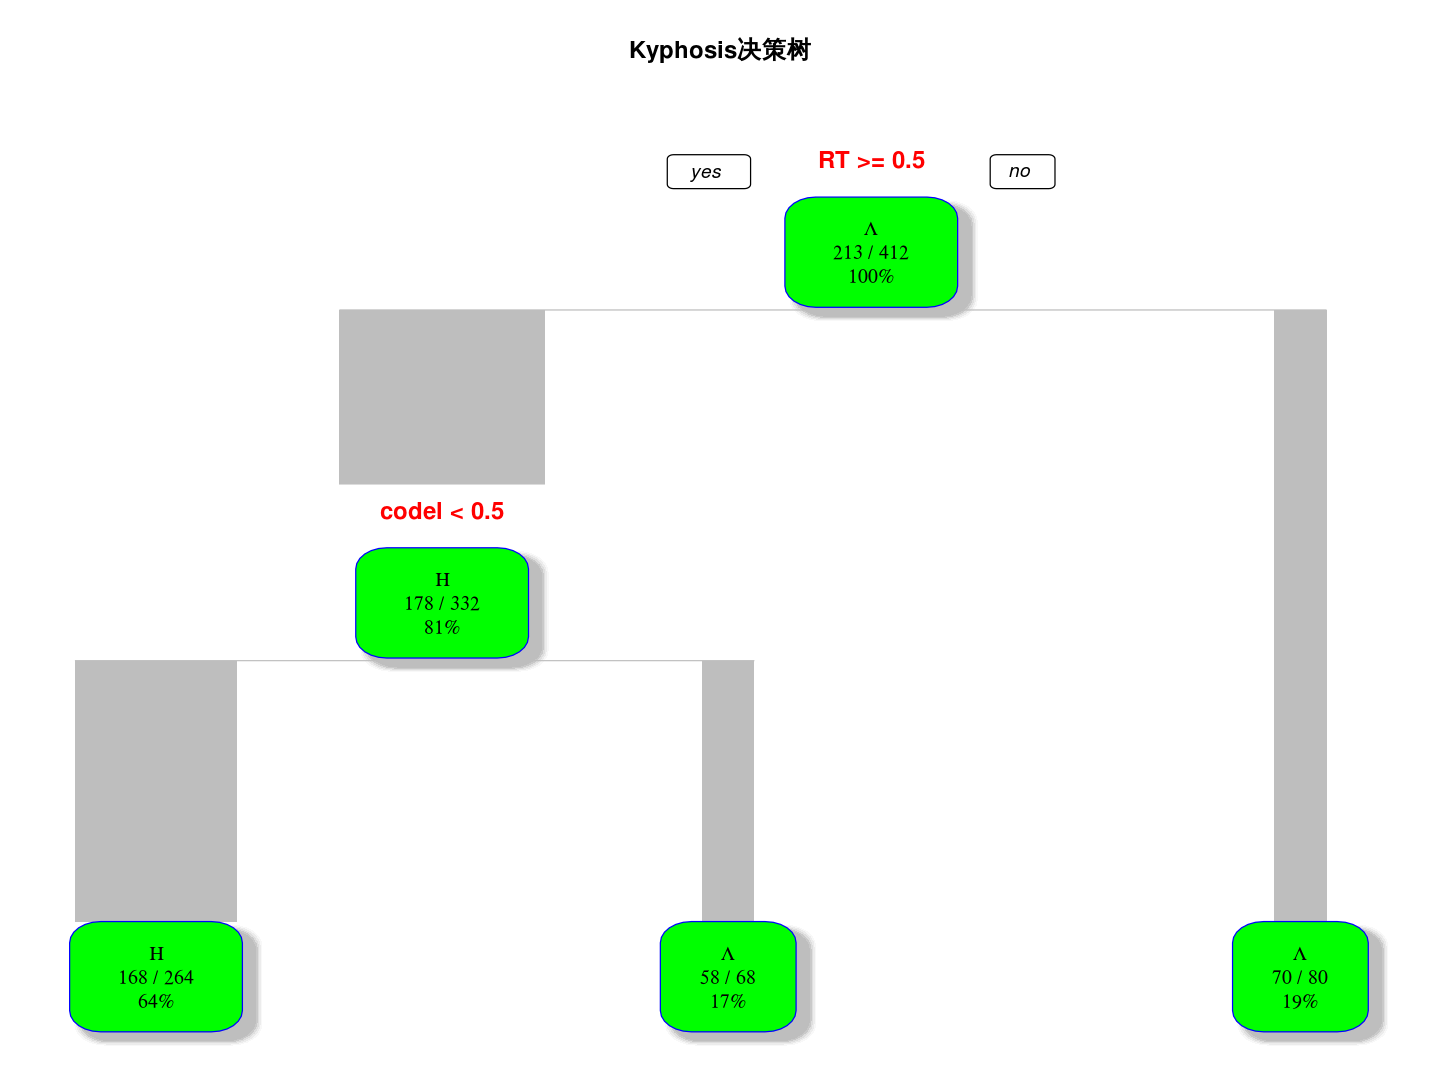

In [36]:
rpart.plot(fit, branch=1, branch.type=2, type=1,extra=102,
shadow.col="gray", box.col="green",
border.col="blue", split.col="red",
split.cex=1.2, main="Kyphosis决策树",family='Helvetica',font=5);

由决策树可以看出：有做放疗和染色体没有缺失的情况下有64%的样本是高复发风险，有做放疗而有染色体缺失的情况下17%的样本是低复发风险；没有做放疗有19%的样本的低复发风险样本。

In [47]:
git <- rpart(label~ IDH1 + RT +CT ,data=data, method="class",control=ct,
             parms = list(split = "gini"),);

In [48]:
git

n=407 (14 observations deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 407 195 L (0.02457002 0.45454545 0.52088452)  
  2) RT>=0.5 327 152 H (0.03058104 0.53516820 0.43425076)  
    4) CT< 0.5 264 106 H (0.03787879 0.59848485 0.36363636) *
    5) CT>=0.5 63  17 L (0.00000000 0.26984127 0.73015873) *
  3) RT< 0.5 80  10 L (0.00000000 0.12500000 0.87500000) *

In [49]:
predict(fit,data[12,])
data[12,]

,,H,L
12,0,0.1470588,0.8529412


,Sample_geo_accession,Gender,Dagnoss,Grade,Age,RT,CT,PD,survival,label,codel,IDH1,dataset
12,GSM405211,1,OD,3,35,1,0,1,21.96,H,1,1,GSM4


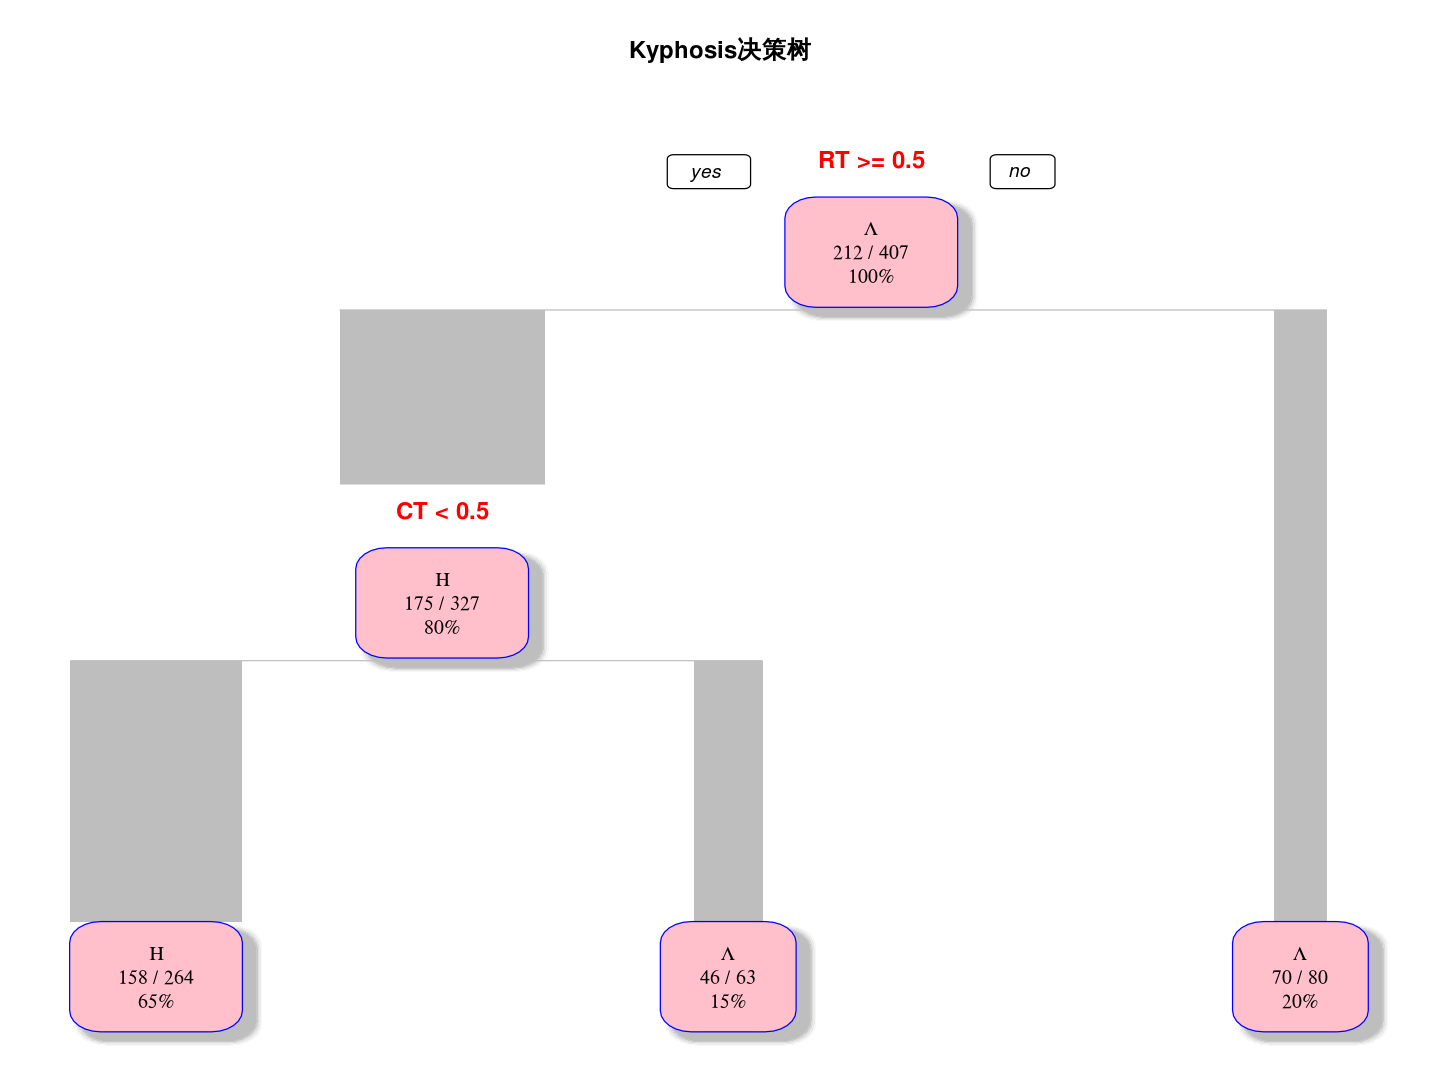

In [50]:
rpart.plot(git, branch=1, branch.type=2, type=1,extra=102,
shadow.col="gray", box.col="pink",
border.col="blue", split.col="red",
split.cex=1.2, main="Kyphosis决策树",family='Helvetica',font=5);

由决策树可以看出：在407个样本中，有15%接受放化疗的样本属于低复发风险，20%个没有接受放疗的样本也属于低复发风险；有接受放疗而没有接受化疗的65%样本是高复发风险。

                                        K近邻分类器

In [3]:
table<-read.table("标化数据.csv",header=T,sep=",")

In [4]:
data=as.numeric(table[,9])

In [5]:
data1=na.omit(data)##去掉生存时间为NA的行

In [6]:
data1

[1] 117.84 140.04 107.04 103.08  38.88  81.72  97.44  36.48 123.36  21.96
 [11] 209.88  16.08  18.00  27.60  39.36  81.24   7.68   6.96  15.24   8.28
 [21]  15.60  23.04   5.76  41.64   3.36  57.24   8.52   7.92   5.64  15.12
 [31]  11.76  10.32   7.44   2.52  12.36   4.92  11.28   7.08  79.44   1.92
 [41]   2.16  10.56  24.60  16.80  75.72  19.08  10.08   0.48  17.76  38.52
 [51]   4.44 150.72   7.08  12.96  57.48 130.32  22.20   4.92   9.84  11.76
 [61]  34.68  18.60   3.84  21.72   3.00   7.80   7.68   0.36   6.96   3.60
 [71]  12.00   6.48  15.48  41.52   3.36  33.12   8.76   8.52  29.52  39.84
 [81]   1.44  48.84  19.20  15.24  37.92  82.44  18.36   2.28  13.92  75.24
 [91]  13.32  10.56   9.60  23.88   3.48   8.64  23.52  21.00  34.08   3.60
[101]   8.88   6.60   6.72  12.72  97.92   3.96  37.20   3.12  81.60  89.76
[111]  12.24  39.72   7.80   4.20 124.08   5.40  74.52  67.44   7.20  47.64
[121]  13.68   7.44   8.04  43.80   3.24  39.60  27.12  60.24   8.52  98.76
[131] 109.32  17.64  89.28   3.36  95.52  66.72   7.56  35.88  14.28  10.68
[141]  78.00   2.28   0.36  28.92   7.32  14.64   4.80   8.40  13.20  14.28
[151]   2.16  19.68  12.72 117.48 118.20  31.92  26.52  31.44  21.72  49.56
[161]  19.32  23.04  39.84  14.52  14.52   0.72  22.20   7.20   0.60  72.48
[171] 189.84  58.32  15.84   0.24  15.12  45.12 136.92   6.36  66.72   0.24
[181]  12.60   5.64   0.96  10.32  45.12   0.24   4.20  14.16   5.40  23.64
[191]  54.60   0.48   0.48   7.32  20.28   9.84  21.36 124.32 248.16   0.60
[201]   7.80  14.40  63.96   6.00   4.08   0.24  62.04  35.16  36.00  72.96
[211]  10.92  73.44  38.40 192.60   0.60  18.36   9.48 224.64   4.20  11.04
[221]   6.60  58.92   2.88   3.12   5.76  41.28  27.60  44.40   6.36  39.24
[231]   3.60  11.76  34.08  39.96   8.76  33.48   5.76  24.24 159.60  44.28
[241]   4.20   2.52  39.84   2.76   3.60  18.96  13.68   5.76   9.12  90.24
[251]  26.64   6.72   7.56   3.36  16.08  84.48  66.72  23.04   1.80   4.08
[261]  13.44   3.48  12.60  15.72   1.32  72.72   4.56  75.72 124.44 134.52
[271]   2.28  26.40  14.40  43.20  73.20  75.60  36.00  26.40 212.40  20.40
[281]  54.00 169.20  37.20  79.20  97.20  50.40  39.60  67.20  63.60  12.00
[291]  79.20   7.20  80.40  34.80  32.40  44.40  68.40 109.20  57.60  43.20
[301]  20.40  40.80  44.40 145.20  40.80 136.80  42.00  46.80 108.00  37.20
[311]  70.80  34.80 144.00  46.80 151.20 115.20   0.00  87.60 116.40  12.00
[321]  26.40  48.00  39.60  88.80  24.00 132.00  18.00  28.80  49.20  36.00
[331]  69.60  16.80  32.40  58.80  40.80  76.80  86.40  46.80  28.80  49.20
[341]  60.00  19.20  87.60  21.60  64.80  14.40  61.20   9.60  58.80  28.80
[351]   1.20  14.40  64.80  99.60 105.60  96.00  39.60  68.40  86.40  56.40
[361]  75.60  20.40  79.20  58.80 100.80  43.20  78.00 115.20  80.40   7.20
[371]  54.00  76.80  15.60  46.80  82.80  70.80  84.00  33.60  61.20  52.80
[381]  52.80  27.60  14.40  76.80  70.80  81.60  44.40  43.20   1.20  48.00
[391]  52.80  55.20 109.20  69.60  37.20  88.80  79.20  52.80  12.00  90.00
[401]  46.80  97.20  73.20  90.00  61.20  38.40  85.20  74.40
attr(,"na.action")
 [1]   1  10 133 137 140 144 158 159 160 161 179 199 257
attr(,"class")
[1] "omit"

In [7]:
a=match(data1,data)

In [8]:
newtable=as.matrix(table[a,])
newtable

,Sample_geo_accession,Gender,Dagnoss,Grade,Age,RT,CT,PD,survival,label,codel,IDH1,dataset
2,GSM405201,0,OD,3,45,1,0,1,117.84,0,1,1,GSM4
3,GSM405202,1,OD,3,29,1,0,1,140.04,0,1,1,GSM4
4,GSM405203,1,OD,3,39,1,0,1,107.04,0,1,0,GSM4
5,GSM405204,1,OD,3,34,NA,NA,1,103.08,0,1,0,GSM4
6,GSM405205,1,OD,3,48,1,1,1,38.88,0,1,1,GSM4
7,GSM405206,1,OD,3,32,1,0,1,81.72,0,1,0,GSM4
8,GSM405207,0,OD,3,44,1,0,1,97.44,0,1,0,GSM4
9,GSM405208,1,OD,3,51,1,1,1,36.48,0,1,1,GSM4
11,GSM405210,1,OD,3,39,1,0,1,123.36,0,1,1,GSM4
12,GSM405211,1,OD,3,35,1,0,1,21.96,1,1,1,GSM4


In [9]:
newdata=as.matrix(as.numeric(newtable[,9]))

In [10]:
newdata
length(newdata)

117.84
140.04
107.04
103.08
38.88
81.72
97.44
36.48
123.36
21.96
209.88


[1] 408

In [11]:
##数据归一化处理
nordata=matrix(,408,1)
    min<-min(newdata) 
    max<-max(newdata) 
   for(i in 1:length(newdata)) {
     nordata[i]<-(newdata[i]-min)/(max-min) 
} 


In [12]:
data0=cbind(nordata,newtable[,10])
data0=cbind(nordata,newtable[,10])
test=data0[1:300,]##训练集数据（第一套数据）
train=data0[301:408,]##验证集数据（第二套数据）

In [13]:
##k近邻（k=5），将验证集的数据逐个取，每个数与训练集的数据用欧氏距离求两者间的距离，取前五个最小距离，对应训练集的标签，大于一半以上的分类即为该验证集数据的标签
length_test <- nrow(test) #300 
length_train <- nrow(train) #108 
train1=matrix(,108,2)
for (i in 1:length_train){  
    dis_test <- data.frame(dis = rep(0, length_test))  
    for (j in 1:length_test){  
        #计算训练集数据和验证集数据的距离  
        dis_test[j, 1] <- dist(rbind(train[i,1], test[j,1]), method = "euclidean")  
        names(dis_test)[1] = "dis"  
        # 保存训练集样本分类  
        dis_test[j, 2] <- test[j, 2]  
        names(dis_test)[2] = "label"  
    }     #按距离从小到大排序  
    dis_test <- dis_test[order(dis_test$dis), ]  
    #定义K的大小  
    k <-5  
    #按因子（也就是分类）进行排序  
    type_freq <- as.data.frame(table(dis_test[1:k, ]$label))  
    #按计数值进行排序  
    type_freq<- type_freq[order(-type_freq$Freq), ]  
    # 记录频数最大的类型  
    train1[i, 1]<-train[i,1] ##验证集的生存时间
    train1[i, 2]<-as.matrix(type_freq[1,1] ) ##分类后的生存标签
    names(train1)[2] = "label" 
} 

In [14]:
train1

0.0822050290135396,1
0.164410058027079,0
0.178916827852998,0
0.585106382978723,0
0.164410058027079,0
0.551257253384913,0
0.169245647969052,0
0.188588007736944,0
0.435203094777563,0
0.149903288201161,0
0.285299806576402,0


In [15]:
##分类器的准确率
a=which(train[,2]==train1[,2])
Accuracy=length(a)/length_train
Accuracy

[1] 0.9907407

                               贝叶斯分类器

In [16]:
data<-read.csv("Data_.csv",header=T,sep=",")

In [17]:
#根据第一列标签将236个样本分为三类
data1=data[which(data[,1]=="OD"),-1]#49*51
data2=data[which(data[,1]=="OA"),-1]#28
data3=data[which(data[,1]=="GBM"),-1]#159

In [18]:
##计算每一类的概率
pOD=matrix(,2,51)
for(i in 1:51){
a=length(which(data1[,i]==-1))
pOD[1,i]=a/49
pOD[2,i]=1-(a/49)
}
pOA=matrix(,2,51)
for(i in 1:51){
a=length(which(data2[,i]==-1))
pOA[1,i]=a/28
pOA[2,i]=1-(a/28)
}
pGBM=matrix(,2,51)
for(i in 1:51){
a=length(which(data3[,i]==-1))
pGBM[1,i]=a/159
pGBM[2,i]=1-(a/159)
}
p=rbind(pOD,pOA,pGBM)


In [19]:
##经过自然对数转换，将概率呈正态分布
p1=log(p)##自然对数转化
rownames(p1)=c('downOD','upOD','downOA','upOA','downGBM','upGBM')
p1###OD/OA/GBM的概率


downOD,-2.50552594,-1.8123788,-1.11923158,-1.4939250,-0.94738132,-0.8007778,-1.6945957,-1.6945957,-1.00144854,-0.39531274,⋯,-0.75632608,-1.11923158,-1.4069136,-0.063178902,-0.75632608,-1.4069136,-1.0586070,-0.49062292,-1.2527630,-1.5892352
upOD,-0.08515781,-0.1782482,-0.39531274,-0.2542341,-0.49062292,-0.5959834,-0.2029408,-0.2029408,-0.45783309,-1.11923158,⋯,-0.63372376,-0.39531274,-0.2809024,-2.793208009,-0.63372376,-0.2809024,-0.4260844,-0.94738132,-0.3364722,-0.2282587
downOA,-0.62415431,-0.6931472,-1.54044504,-0.4989912,-1.94591015,-1.3862944,-0.4989912,-1.3862944,-1.38629436,-3.33220451,⋯,-1.94591015,-1.38629436,-1.3862944,-Inf,-1.38629436,-1.2527630,-1.0296194,-2.23359222,-1.3862944,-0.4418328
upOA,-0.76725515,-0.6931472,-0.24116206,-0.9343092,-0.15415068,-0.2876821,-0.9343092,-0.2876821,-0.28768207,-0.03636764,⋯,-0.15415068,-0.28768207,-0.2876821,0.000000000,-0.28768207,-0.3364722,-0.4418328,-0.11332869,-0.2876821,-1.0296194
downGBM,-0.66218495,-1.3800247,-2.42984687,-0.5802678,-3.68260984,-3.4594663,-1.8908504,-1.4853853,-2.58399755,-4.37575702,⋯,-2.87167962,-3.12299405,-2.3608540,-5.068904202,-2.98946266,-1.5723966,-2.0731719,-3.12299405,-1.8500284,-1.1568812
upGBM,-0.72509878,-0.2897807,-0.09217046,-0.8204090,-0.02547909,-0.0319516,-0.1636294,-0.2567198,-0.07847162,-0.01265840,⋯,-0.05826891,-0.04502368,-0.0990909,-0.006309169,-0.05162437,-0.2326223,-0.1344303,-0.04502368,-0.1710644,-0.3775563


In [20]:
##对每一个样本进行分析，每一个样本都有对应的六行矩阵，分别为（OD(0/1)、OA(0/1)、GBM(0/1)），并且与上面的概率矩阵进行相乘
#最后计算每个样本对应类型的概率，取最大的概率对应的标签
data0=data[,-1]
newdata=(data0+1)/2
mat=matrix(,6,51)
result=matrix(,236,2)
for(i in 1:236){
index=which(newdata[i,]==1)
mat[1,index]<-0
mat[1,-index]<-1
mat[2,index]<-1
mat[2,-index]<-0
mat[3,]=mat[1,]
mat[4,]=mat[2,]
mat[5,]=mat[1,]
mat[6,]=mat[2,]
pmat=p1*mat
OD=sum(pmat[1,])+sum(pmat[2,])
OA=sum(pmat[3,-45])+sum(pmat[4,-45])##gene45存在负无穷
GBM=sum(pmat[5,])+sum(pmat[6,])
maxnum=max(OD,OA,GBM)
if(OD==maxnum){result[i,2]<-'OD'}
else 
if(OA==maxnum){result[i,2]<-'OA'}
else{result[i,2]<-'GBM'}
result[,1]=as.matrix(data[,1])
}


In [21]:
#计算敏感性
a=which(result[,2]==result[,1])
Sensitivity=length(a)/236
Sensitivity


[1] 0.6779661

用R跑出来的结果（敏感性为 0.7711864）与这里的结果（0.6779661）有误差，主要是result[,1]分类的标签有误差,不知道为什么？？？

                                   SVM

In [22]:
library(e1071);

In [23]:
data<-read.csv(file="newdata.csv",header=T,sep=",");
data<-na.omit(data);
data;

,Age,RT,survival,codel,IDH1,Dagnoss
1,45,1,117.84,1,1,OD
2,29,1,140.04,1,1,OD
3,39,1,107.04,1,0,OD
5,48,1,38.88,1,1,OD
6,32,1,81.72,1,0,OD
7,44,1,97.44,1,0,OD
8,51,1,36.48,1,1,OD
10,39,1,123.36,1,1,OD
11,35,1,21.96,1,1,OD
12,23,1,209.88,1,0,OD


In [24]:
loc<-seq(1,length(data[,1]),by=10);
train<-data[loc,];
test<-data[-loc,];

In [25]:
model<-svm(formula=Dagnoss~.,data=train,kernel="linear",cost=10,scale=FALSE);
print(model);


Call:
svm(formula = Dagnoss ~ ., data = train, kernel = "linear", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.2 

Number of Support Vectors:  21



In [26]:
results<-predict(object=model,newdata=data,type="class");
results

1   2   3   5   6   7   8  10  11  12  13  14  15  16  17  18  29  30  32  40 
 OD  OA   A  OA   A   A  OA  OA GBM  OD GBM GBM   A   A   A GBM   A   A GBM   A 
 44  45  46  47  48  53  54  55  56  57  59  60  61  64  68  72  73  74  80  94 
GBM GBM  OA GBM   A  OD GBM GBM   A  OD   A   A   A GBM GBM GBM   A   A GBM   A 
 96  97  98 105 110 114 117 118 119 124 127 128 129 130 131 135 138 140 156 162 
GBM   A GBM   A  OA   A   A   A  OA GBM  OA   A  OA GBM  OD  OD  OD   A GBM GBM 
166 167 169 170 174 176 177 185 186 187 199 200 205 207 214 218 221 222 223 228 
 OD   A  OA GBM   A   A GBM GBM  OA  OD   A GBM   A   A   A  OA   A   A   A   A 
230 231 238 245 246 249 257 258 260 261 262 267 269 276 284 285 286 287 288 289 
  A   A GBM   A   A GBM   A   A   A   A   A GBM  OA   A   A   A   A  OD   A  OD 
290 291 292 293 294 295 296 297 298 300 301 302 303 304 305 306 307 308 309 310 
  A   A   A   A   A   A   A   A   A   A   A   A   A   A   A GBM  OA   A   A   A 
311 312 313 314 315 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 
  A   A   A  OA   A   A   A   A  OA   A   A   A   A   A   A   A  OD   A   A   A 
332 333 334 335 336 337 338 339 340 341 342 343 345 346 347 348 349 350 351 352 
  A   A   A   A   A   A   A   A   A   A   A   A   A   A GBM   A   A   A   A   A 
353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 
 OD GBM   A   A   A   A   A   A   A GBM GBM   A   A  OA   A   A   A   A  OD   A 
373 374 375 376 377 378 379 380 381 382 383 385 386 387 388 389 390 391 392 393 
 OD   A   A  OD   A   A  OD  OA  OA GBM  OA  OA  OA   A  OD   A   A  OA  OA   A 
394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 
 OA GBM  OA  OA  OA   A   A GBM   A  OA  OD  OA  OA  OA  OA   A   A GBM  OD  OA 
414 415 416 417 418 419 420 
  A   A   A  OA   A   A  OA 
Levels:  A GBM OA OD

In [27]:
res<-table(results,data$Dagnoss);
res
(res[2,2]+res[3,3]+res[4,4]+res[5,5])/227

       
results     A GBM OA OD
         0  0   0  0  0
    A    0 77  27 21 10
    GBM  0  6  20  5  5
    OA   0  4   3 16 13
    OD   1  4   1  7  7

[1] 0.5286344

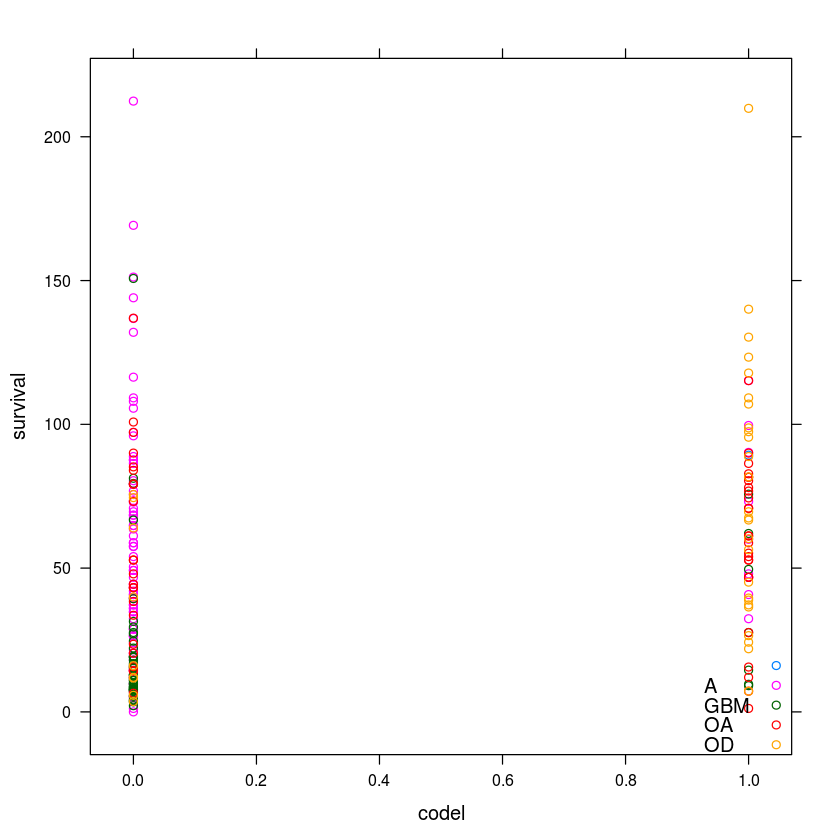

In [28]:
library(lattice);
xyplot(survival~codel,data=data,groups=Dagnoss,auto.key=list(corner=c(1,0)));